In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df=pd.read_csv(r"D:\MinorProject\MovieDataS_self.csv")

In [3]:
df.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings
0,The Shawshank Redemption,1,100,The Shawshank Redemption holds the Number 1 sp...,10
1,The Shawshank Redemption,1,101,However delightful as it is The Shawshank Rede...,10
2,The Shawshank Redemption,1,102,However delightful as it is The Shawshank Rede...,10
3,The Shawshank Redemption,1,104,"""The Shawshank Redemption"" is a cinematic gem ...",10
4,The Shawshank Redemption,1,105,"""Hope is a good thing probably best of all & g...",10


In [4]:
df.shape

(101, 5)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Movie Name    0
Movie ID      0
User ID       0
Reviews       0
Ratings       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie Name  101 non-null    object
 1   Movie ID    101 non-null    int64 
 2   User ID     101 non-null    int64 
 3   Reviews     101 non-null    object
 4   Ratings     101 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.1+ KB


In [8]:
df.describe()

,Movie ID,User ID,Ratings
count,101.000000,101.000000,101.000000
mean,5.465347,114.188119,6.336634
std,2.893318,10.400685,3.453338
min,1.000000,100.000000,1.000000
25%,3.000000,106.000000,3.000000
50%,5.000000,112.000000,7.000000
75%,8.000000,122.000000,10.000000
max,10.000000,153.000000,10.000000


In [9]:
df[:5]

,Movie Name,Movie ID,User ID,Reviews,Ratings
0,The Shawshank Redemption,1,100,The Shawshank Redemption holds the Number 1 sp...,10
1,The Shawshank Redemption,1,101,However delightful as it is The Shawshank Rede...,10
2,The Shawshank Redemption,1,102,However delightful as it is The Shawshank Rede...,10
3,The Shawshank Redemption,1,104,"""The Shawshank Redemption"" is a cinematic gem ...",10
4,The Shawshank Redemption,1,105,"""Hope is a good thing probably best of all & g...",10


Text(0.5, 1.0, 'Ratings distribution')

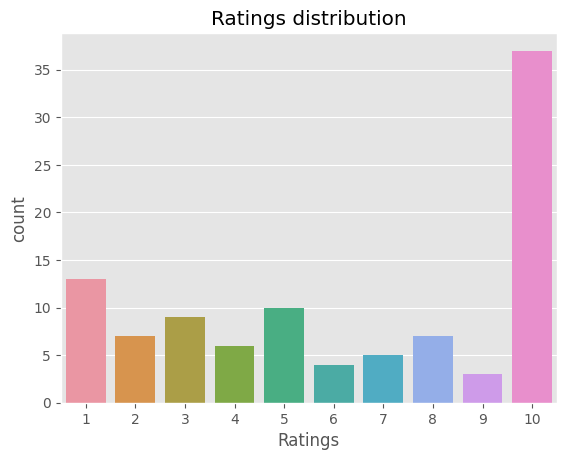

In [10]:
sns.countplot(x='Ratings', data=df)
plt.title("Ratings distribution")


In [11]:
for i in range(5):
    print("Review: ", [i])
    print(df['Reviews'].iloc[i], "\n")
    print("Ratings: ", df['Ratings'].iloc[i], "\n\n")

Review:  [0]
The Shawshank Redemption holds the Number 1 spot in the Top-250 English Movies listed by IMBd with 9.3 rating. It is one among the best movies ever made in World Cinema and applauded by many film critics. This film was directed by Frank Darabont who adopted the storyline from Stephen King's Novel - 'Rita Hayworth and Shawshank Redemption'

Tim Robbins played his career best lead performance as Andy Dufresne along with Morgan Freeman who played the role of 'Red',  an influential prisoner, who can bring in any stuff inside the jail. Morgan also narrates the story from his perspective with his impeccable voice over throughout the film. He basically narrates the life journey of the lead character - Andy Dufresne. 

The movie begin with a murder mystery which makes the innocent banker Andy Dufresne to go life prisonment in Shawshank prison against the charges for murdering his wife and her lover. Initially, as a viewer audience may expect a murder mystery to be solved but surpr

In [12]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [13]:
df['word count'] = df['Reviews'].apply(no_of_words)

In [14]:
df.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings,word count
0,The Shawshank Redemption,1,100,The Shawshank Redemption holds the Number 1 sp...,10,458
1,The Shawshank Redemption,1,101,However delightful as it is The Shawshank Rede...,10,671
2,The Shawshank Redemption,1,102,However delightful as it is The Shawshank Rede...,10,671
3,The Shawshank Redemption,1,104,"""The Shawshank Redemption"" is a cinematic gem ...",10,401
4,The Shawshank Redemption,1,105,"""Hope is a good thing probably best of all & g...",10,291


In [15]:
def categorize_movie_rating(rating):
    if rating > 6:
        return 3; #3 means positve rating
    elif rating >= 3:
        return 2; #neutral
    else:
        return 1; #not liked rating
     

In [16]:
df['sentiment'] = df['Ratings'].apply(categorize_movie_rating)

In [17]:
df[-5:]

,Movie Name,Movie ID,User ID,Reviews,Ratings,word count,sentiment
96,There Will Be Blood,10,127,"It's about expansion, it's about capitalism, a...",10,618,3
97,There Will Be Blood,10,107,"Totally confused, but never fear, I got it.\r\...",5,32,2
98,There Will Be Blood,10,115,I was looking forward to seeing this when it w...,5,425,2
99,There Will Be Blood,10,128,I think the last significant movie I saw that ...,3,307,2
100,There Will Be Blood,10,102,Do yourself a favor and do not waste your time...,2,140,1


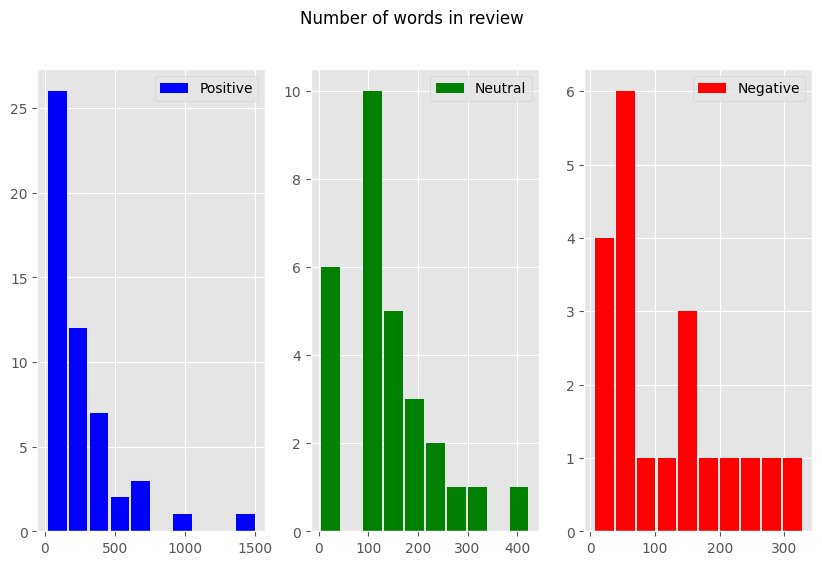

In [18]:
fig, ax = plt.subplots(1,3,figsize=(10,6))
ax[0].hist(df[df['sentiment'] ==3]['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 2]['word count'], label='Neutral', color='green', rwidth=0.9);
ax[1].legend(loc='upper right');
ax[2].hist(df[df['sentiment'] == 1]['word count'], label='Negative', color='red', rwidth=0.9);
ax[2].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [21]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [22]:
df.Reviews = df['Reviews'].apply(data_processing)

In [23]:
df.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings,word count,sentiment
0,The Shawshank Redemption,1,100,shawshank redemption holds number 1 spot top25...,10,458,3
1,The Shawshank Redemption,1,101,however delightful shawshank redemption allego...,10,671,3
2,The Shawshank Redemption,1,102,however delightful shawshank redemption allego...,10,671,3
3,The Shawshank Redemption,1,104,shawshank redemption cinematic gem transcends ...,10,401,3
4,The Shawshank Redemption,1,105,hope good thing probably best good thing never...,10,291,3


In [24]:
#checking the duplicate entries
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  0


In [25]:
 #drops duplicate entries if present
df = df.drop_duplicates('Reviews')

In [26]:
stemmer = PorterStemmer() #not worked


In [27]:
def tokenize_review(review):
    return nltk.word_tokenize(review)

In [28]:
df['tokenized_review'] = df['Reviews'].apply(lambda x: tokenize_review(x))

In [29]:
df[:5]

,Movie Name,Movie ID,User ID,Reviews,Ratings,word count,sentiment,tokenized_review
0,The Shawshank Redemption,1,100,shawshank redemption holds number 1 spot top25...,10,458,3,"[shawshank, redemption, holds, number, 1, spot..."
1,The Shawshank Redemption,1,101,however delightful shawshank redemption allego...,10,671,3,"[however, delightful, shawshank, redemption, a..."
3,The Shawshank Redemption,1,104,shawshank redemption cinematic gem transcends ...,10,401,3,"[shawshank, redemption, cinematic, gem, transc..."
4,The Shawshank Redemption,1,105,hope good thing probably best good thing never...,10,291,3,"[hope, good, thing, probably, best, good, thin..."
5,The Dark Night,2,106,confidently directed dark brooding packed impr...,10,45,3,"[confidently, directed, dark, brooding, packed..."


In [30]:
def stem_sentence(sentence):
   return [stemmer.stem(word) for word in sentence]



In [31]:
# Apply the function to the review column of the dataframe
df['stem_new'] = df['tokenized_review'].apply(lambda x: stem_sentence(x))

In [32]:
df[:5]

,Movie Name,Movie ID,User ID,Reviews,Ratings,word count,sentiment,tokenized_review,stem_new
0,The Shawshank Redemption,1,100,shawshank redemption holds number 1 spot top25...,10,458,3,"[shawshank, redemption, holds, number, 1, spot...","[shawshank, redempt, hold, number, 1, spot, to..."
1,The Shawshank Redemption,1,101,however delightful shawshank redemption allego...,10,671,3,"[however, delightful, shawshank, redemption, a...","[howev, delight, shawshank, redempt, allegori,..."
3,The Shawshank Redemption,1,104,shawshank redemption cinematic gem transcends ...,10,401,3,"[shawshank, redemption, cinematic, gem, transc...","[shawshank, redempt, cinemat, gem, transcend, ..."
4,The Shawshank Redemption,1,105,hope good thing probably best good thing never...,10,291,3,"[hope, good, thing, probably, best, good, thin...","[hope, good, thing, probabl, best, good, thing..."
5,The Dark Night,2,106,confidently directed dark brooding packed impr...,10,45,3,"[confidently, directed, dark, brooding, packed...","[confid, direct, dark, brood, pack, impress, a..."


In [33]:
def no_of_wrds(text): 
    word_count = len(text)
    return word_count

In [34]:
df['wrd_cnt']=df['stem_new'].apply(lambda x: no_of_wrds(x))

In [35]:
df.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings,word count,sentiment,tokenized_review,stem_new,wrd_cnt
0,The Shawshank Redemption,1,100,shawshank redemption holds number 1 spot top25...,10,458,3,"[shawshank, redemption, holds, number, 1, spot...","[shawshank, redempt, hold, number, 1, spot, to...",275
1,The Shawshank Redemption,1,101,however delightful shawshank redemption allego...,10,671,3,"[however, delightful, shawshank, redemption, a...","[howev, delight, shawshank, redempt, allegori,...",317
3,The Shawshank Redemption,1,104,shawshank redemption cinematic gem transcends ...,10,401,3,"[shawshank, redemption, cinematic, gem, transc...","[shawshank, redempt, cinemat, gem, transcend, ...",229
4,The Shawshank Redemption,1,105,hope good thing probably best good thing never...,10,291,3,"[hope, good, thing, probably, best, good, thin...","[hope, good, thing, probabl, best, good, thing...",162
5,The Dark Night,2,106,confidently directed dark brooding packed impr...,10,45,3,"[confidently, directed, dark, brooding, packed...","[confid, direct, dark, brood, pack, impress, a...",31


<h3>Positive review

In [36]:
pos_reviews =  df[df.sentiment == 3]
pos_reviews.tail()

,Movie Name,Movie ID,User ID,Reviews,Ratings,word count,sentiment,tokenized_review,stem_new,wrd_cnt
92,There Will Be Blood,10,108,compelling family drama charting one mans rise...,9,123,3,"[compelling, family, drama, charting, one, man...","[compel, famili, drama, chart, one, man, rise,...",73
93,There Will Be Blood,10,124,since watched film acting casting damn convinc...,7,184,3,"[since, watched, film, acting, casting, damn, ...","[sinc, watch, film, act, cast, damn, convinc, ...",83
94,There Will Be Blood,10,123,theres prospector name daniel plainview weathe...,8,122,3,"[theres, prospector, name, daniel, plainview, ...","[there, prospector, name, daniel, plainview, w...",67
95,There Will Be Blood,10,119,blood fine film fact would go far say one best...,10,166,3,"[blood, fine, film, fact, would, go, far, say,...","[blood, fine, film, fact, would, go, far, say,...",92
96,There Will Be Blood,10,127,expansion capitalism whatever caused demise wi...,10,618,3,"[expansion, capitalism, whatever, caused, demi...","[expans, capit, whatev, caus, demis, wild, wes...",313


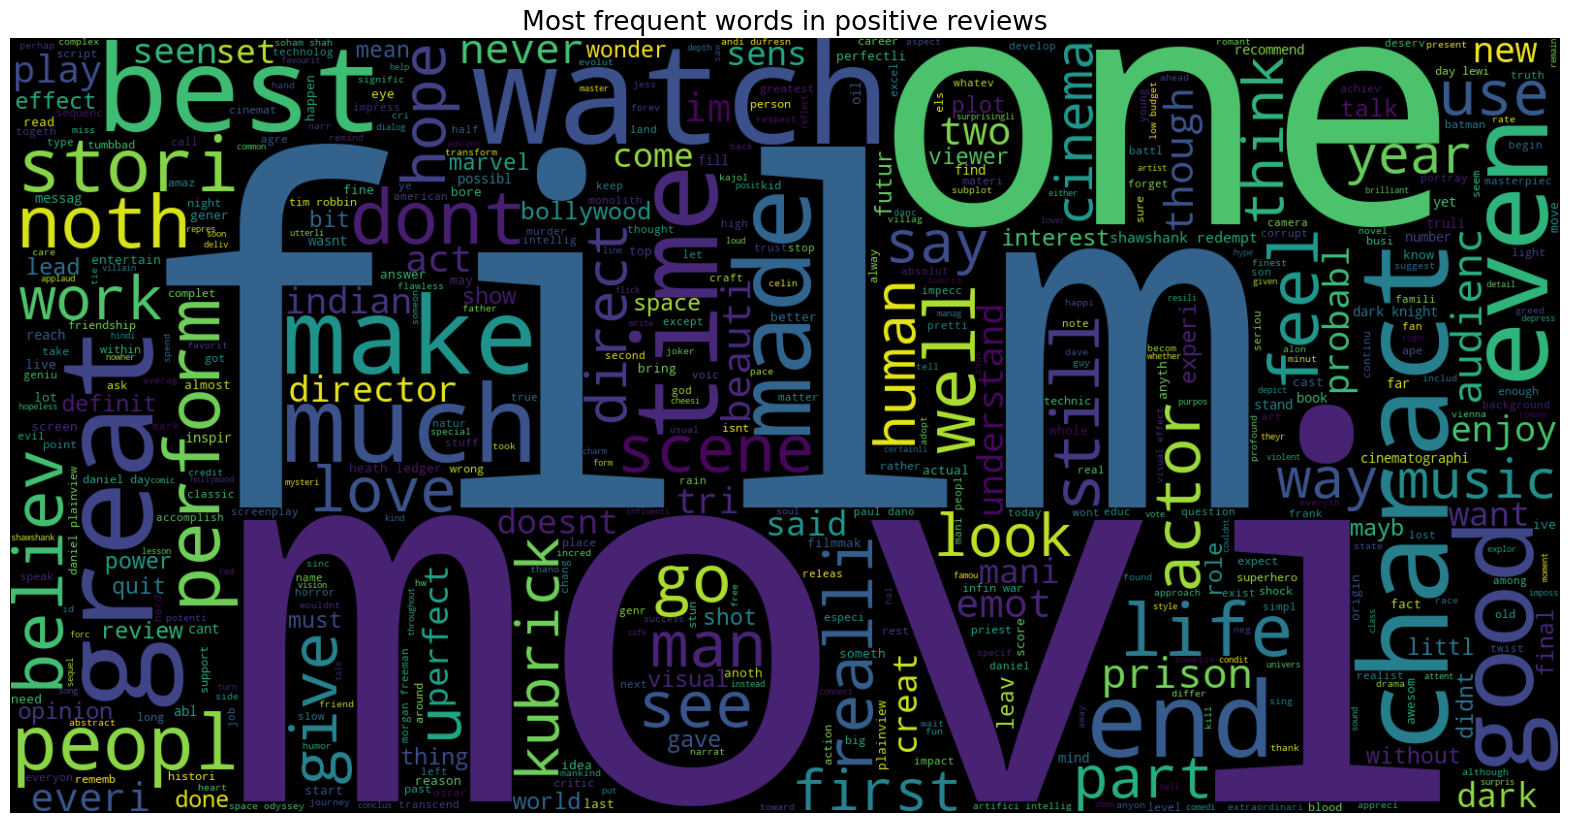

In [37]:
#visual representation of most frequent words in positive reviews 
text = ' '.join([str(word) for review in pos_reviews['stem_new'] for word in review])

plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [38]:
stemmed_tokens = [word for review in pos_reviews['stem_new'] for word in review]

# Compute frequency distribution
freq_dist = nltk.FreqDist(stemmed_tokens)

# Print most common words
print(freq_dist.most_common(10))

[('movi', 160), ('film', 130), ('one', 48), ('watch', 48), ('like', 46), ('great', 41), ('charact', 37), ('best', 35), ('time', 33), ('peopl', 31)]


In [39]:
pos_words=pd.DataFrame(freq_dist.most_common(15))
pos_words.columns=['word','count']
pos_words.head()

,word,count
0,movi,160
1,film,130
2,one,48
3,watch,48
4,like,46


In [40]:
#ploting a bar graph for the positive words in the reviews
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')


<h3>Negative review

In [41]:
neg_reviews =  df[df.sentiment == 1]
neg_reviews.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings,word count,sentiment,tokenized_review,stem_new,wrd_cnt
14,The Dark Night,2,119,heath ledger great role joker doubt early depa...,2,52,1,"[heath, ledger, great, role, joker, doubt, ear...","[heath, ledger, great, role, joker, doubt, ear...",30
15,The Dark Night,2,124,story really bloated many characters showing f...,1,84,1,"[story, really, bloated, many, characters, sho...","[stori, realli, bloat, mani, charact, show, fa...",42
16,The Shawshank Redemption,1,107,finally decided see film reading good reviews ...,1,202,1,"[finally, decided, see, film, reading, good, r...","[final, decid, see, film, read, good, review, ...",106
19,The Shawshank Redemption,1,123,movie absurdly overrated people think soppy af...,1,148,1,"[movie, absurdly, overrated, people, think, so...","[movi, absurdli, overr, peopl, think, soppi, a...",79
20,The Shawshank Redemption,1,126,satisfying good movie great part movie magnifi...,2,60,1,"[satisfying, good, movie, great, part, movie, ...","[satisfi, good, movi, great, part, movi, magni...",36


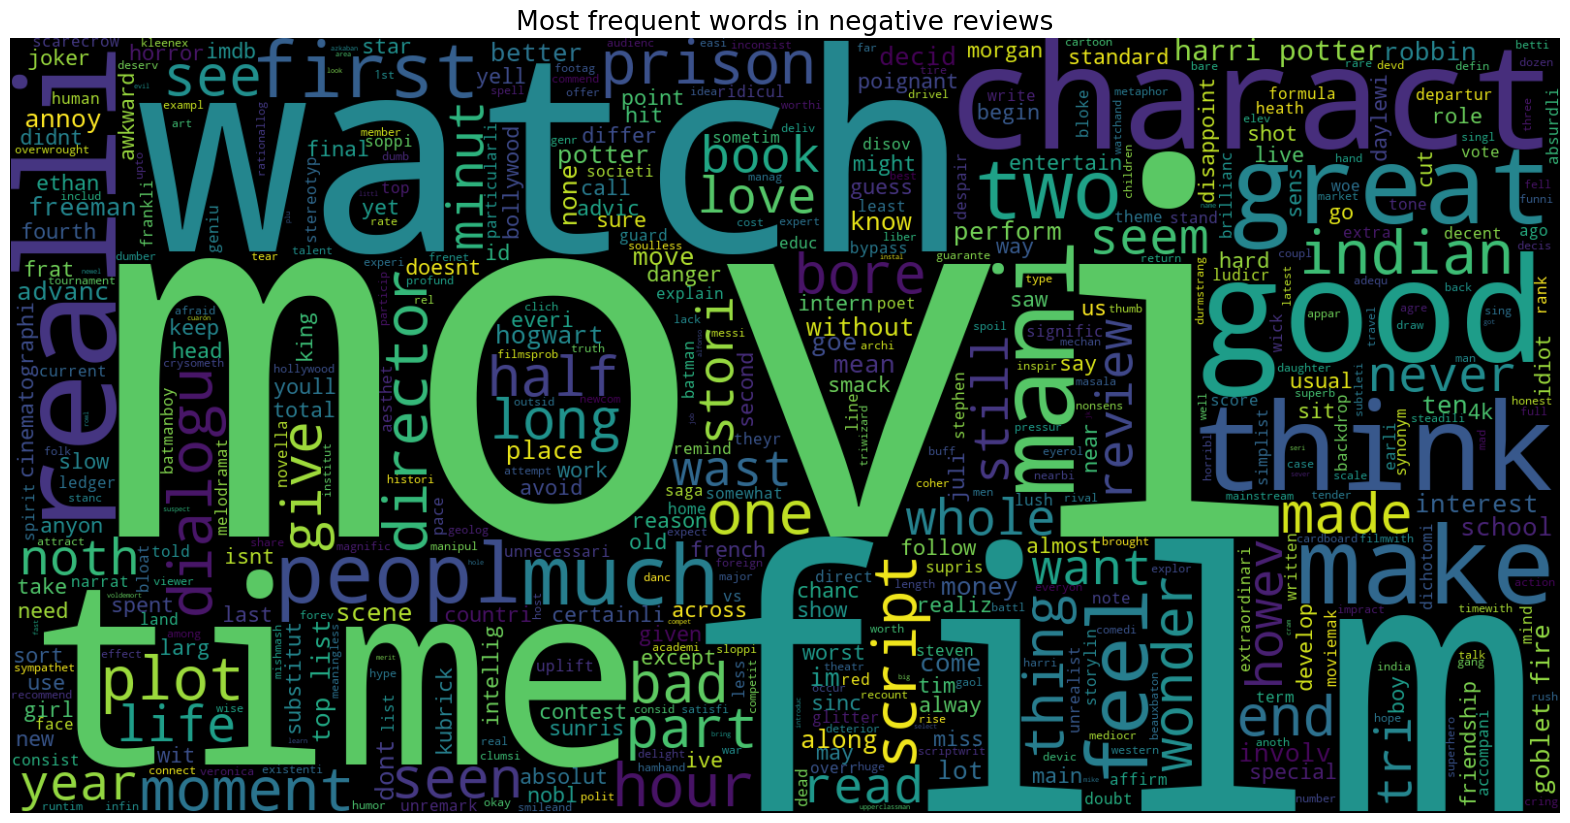

In [42]:
#visual representation of most frequent words in positive reviews 
text = ' '.join([str(word) for review in neg_reviews['stem_new'] for word in review])

plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [43]:
stemmed_tokens = [word for review in neg_reviews['stem_new'] for word in review]

# Compute frequency distribution
freq_dist = nltk.FreqDist(stemmed_tokens)

# Print most common words
print(freq_dist.most_common(10))

[('movi', 50), ('film', 26), ('watch', 14), ('time', 12), ('charact', 9), ('good', 9), ('realli', 8), ('think', 8), ('like', 8), ('great', 7)]


In [44]:
neg_words=pd.DataFrame(freq_dist.most_common(15))
neg_words.columns=['word','count']
neg_words[:10]

,word,count
0,movi,50
1,film,26
2,watch,14
3,time,12
4,charact,9
5,good,9
6,realli,8
7,think,8
8,like,8
9,great,7


In [45]:
#ploting a bar graph for the positive words in the reviews
px.bar(neg_words, x='count', y='word', title='Common words in Negative reviews', color = 'word')


<h3> Neutral reviews

In [46]:
neut_reviews =  df[df.sentiment == 2]
neut_reviews.tail()

,Movie Name,Movie ID,User ID,Reviews,Ratings,word count,sentiment,tokenized_review,stem_new,wrd_cnt
88,A Space Odyssey,9,122,kubrick made great films also made drivel spac...,4,109,2,"[kubrick, made, great, films, also, made, driv...","[kubrick, made, great, film, also, made, drive...",62
89,A Space Odyssey,9,116,movie long really long lasts 25h rather much m...,3,222,2,"[movie, long, really, long, lasts, 25h, rather...","[movi, long, realli, long, last, 25h, rather, ...",104
97,There Will Be Blood,10,107,totally confused never fear got performances c...,5,32,2,"[totally, confused, never, fear, got, performa...","[total, confus, never, fear, got, perform, cin...",20
98,There Will Be Blood,10,115,looking forward seeing released cinemas story ...,5,425,2,"[looking, forward, seeing, released, cinemas, ...","[look, forward, see, releas, cinema, stori, si...",210
99,There Will Be Blood,10,128,think last significant movie saw featured dani...,3,307,2,"[think, last, significant, movie, saw, feature...","[think, last, signific, movi, saw, featur, dan...",144


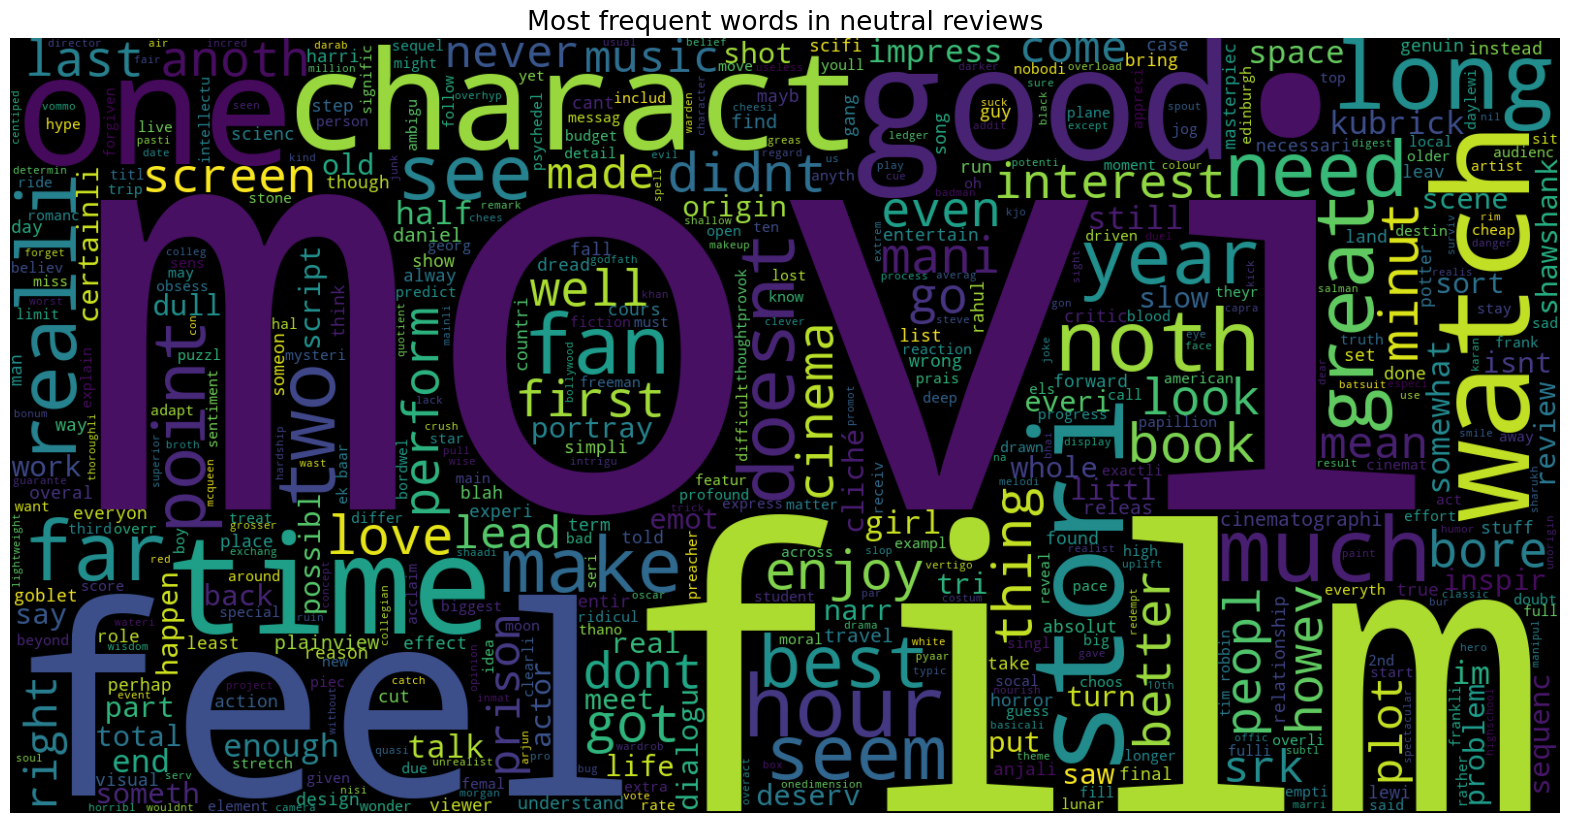

In [47]:
#visual representation of most frequent words in positive reviews 
text = ' '.join([str(word) for review in neut_reviews['stem_new'] for word in review])

plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral reviews', fontsize = 19)
plt.show()

In [48]:
stemmed_tokens = [word for review in neut_reviews['stem_new'] for word in review]

# Compute frequency distribution
freq_dist = nltk.FreqDist(stemmed_tokens)

# Print most common words
print(freq_dist.most_common(10))

[('movi', 40), ('film', 39), ('like', 22), ('feel', 20), ('good', 16), ('one', 15), ('charact', 15), ('time', 15), ('watch', 14), ('get', 13)]


In [49]:
neut_words=pd.DataFrame(freq_dist.most_common(15))
neut_words.columns=['word','count']
neut_words[:10]

,word,count
0,movi,40
1,film,39
2,like,22
3,feel,20
4,good,16
5,one,15
6,charact,15
7,time,15
8,watch,14
9,get,13


In [50]:
#ploting a bar graph for the positive words in the reviews
px.bar(neut_words, x='count', y='word', title='Common words in Neutral reviews', color = 'word')


<h3> Building Models

In [51]:
X=df['Reviews']
Y=df['sentiment']

In [52]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['Reviews'])

In [53]:
#training the data 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [54]:
#information about training and testing data 
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (74, 3440)
Size of y_train:  (74,)
Size of x_test:  (25, 3440)
Size of y_test:  (25,)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
from sklearn import linear_model
warnings.filterwarnings('ignore')

In [56]:
x_train.dtype

dtype('float64')

In [57]:
#linear Logistic Regression Model
logreg=linear_model.LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred=logreg.predict(x_test)
log_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(log_acc * 100))


Test accuracy: 52.00%


In [58]:
#confusion matrix to define the performance of a classification algorithm
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 0  0  5]
 [ 0  0  7]
 [ 0  0 13]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         7
           3       0.52      1.00      0.68        13

    accuracy                           0.52        25
   macro avg       0.17      0.33      0.23        25
weighted avg       0.27      0.52      0.36        25



In [59]:
#predicts the tag of a text such as a piece of email or article
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 52.00%


In [60]:
#an algorith that attempts to find a hyperplane to maximize the distance between classified samples
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 52.00%


In [61]:
#confusion matrix using LinearSVC data values
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 0  0  5]
 [ 0  0  7]
 [ 0  0 13]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         7
           3       0.52      1.00      0.68        13

    accuracy                           0.52        25
   macro avg       0.17      0.33      0.23        25
weighted avg       0.27      0.52      0.36        25



<h3>Correlation

In [62]:
#displays the column names
df.columns

Index(['Movie Name', 'Movie ID', 'User ID', 'Reviews', 'Ratings', 'word count',
       'sentiment', 'tokenized_review', 'stem_new', 'wrd_cnt'],
      dtype='object')

In [63]:
#shows the number of users per movie  
def filter_by_movie_id(df, column_name, movie_id):
    return df[df[column_name] == movie_id]


In [64]:
#calls the filter by movie id function to check the number of user per movie
filtered_df = filter_by_movie_id(df, 'Movie ID', 7)
print(filtered_df)

         Movie Name  Movie ID  User ID  \
61  Before Sunrise          7      120   
62  Before Sunrise          7      109   
63  Before Sunrise          7      130   
64  Before Sunrise          7      100   
65  Before Sunrise          7      123   
66  Before Sunrise          7      129   
67  Before Sunrise          7      106   
68  Before Sunrise          7      101   
69  Before Sunrise          7      121   
70  Before Sunrise          7      104   

                                              Reviews  Ratings  word count  \
61  traveling train europe american jesse ethan ha...       10         177   
62  american tourist jesse ethan hawke meets frenc...       10         183   
63  sunrise wonderful love story among top 5 favor...        8         170   
64  sunrise 1995 essentially plot though thats poi...        4         284   
65  whod thunk back would spawn trilogy guess nobo...        6         128   
66  always come across scenes movie never got chan...        2       

In [65]:
#data for a particular movie
filtered_df.head()

,Movie Name,Movie ID,User ID,Reviews,Ratings,word count,sentiment,tokenized_review,stem_new,wrd_cnt
61,Before Sunrise,7,120,traveling train europe american jesse ethan ha...,10,177,3,"[traveling, train, europe, american, jesse, et...","[travel, train, europ, american, jess, ethan, ...",88
62,Before Sunrise,7,109,american tourist jesse ethan hawke meets frenc...,10,183,3,"[american, tourist, jesse, ethan, hawke, meets...","[american, tourist, jess, ethan, hawk, meet, f...",101
63,Before Sunrise,7,130,sunrise wonderful love story among top 5 favor...,8,170,3,"[sunrise, wonderful, love, story, among, top, ...","[sunris, wonder, love, stori, among, top, 5, f...",86
64,Before Sunrise,7,100,sunrise 1995 essentially plot though thats poi...,4,284,2,"[sunrise, 1995, essentially, plot, though, tha...","[sunris, 1995, essenti, plot, though, that, po...",146
65,Before Sunrise,7,123,whod thunk back would spawn trilogy guess nobo...,6,128,2,"[whod, thunk, back, would, spawn, trilogy, gue...","[whod, thunk, back, would, spawn, trilog, gues...",59


In [66]:
#shows the number of movies per user  
def filter_by_user_id(df, column_name, user_id):
    return df[df[column_name] == user_id]


In [67]:
#calls the function to check one user has seen how many movies
filtered_df2 = filter_by_user_id(df, 'User ID', 125)
print(filtered_df2)

   Movie Name  Movie ID  User ID  \
33   3 Idiots         4      125   

                                              Reviews  Ratings  word count  \
33  13 first movielove nothing compared movie nobo...       10         117   

    sentiment                                   tokenized_review  \
33          3  [13, first, movielove, nothing, compared, movi...   

                                             stem_new  wrd_cnt  
33  [13, first, movielov, noth, compar, movi, nobo...       57  


In [68]:
#copying the columns 
df2 = df[['Movie ID', 'User ID','Ratings']].copy()
df2.head(10)

,Movie ID,User ID,Ratings
0,1,100,10
1,1,101,10
3,1,104,10
4,1,105,10
5,2,106,10
6,2,107,10
7,2,108,10
8,2,109,10
9,2,110,10
10,2,111,7


In [69]:
#values sorted according to UserID
user_ratings1= df2.sort_values(['User ID'])
user_ratings1.head(10)

,Movie ID,User ID,Ratings
0,1,100,10
64,7,100,4
59,6,100,10
1,1,101,10
90,9,101,2
68,7,101,3
29,3,101,4
82,9,102,10
47,5,102,1
100,10,102,2


In [70]:
# finding the average of every user
df2['AverageRatings'] =df2.groupby('User ID')['Ratings'].transform('mean')
df2.sort_values(['User ID']).head()

,Movie ID,User ID,Ratings,AverageRatings
0,1,100,10,8.00
64,7,100,4,8.00
59,6,100,10,8.00
1,1,101,10,4.75
90,9,101,2,4.75


In [71]:
df2.head()

,Movie ID,User ID,Ratings,AverageRatings
0,1,100,10,8.000000
1,1,101,10,4.750000
3,1,104,10,7.000000
4,1,105,10,6.666667
5,2,106,10,7.750000


In [72]:
# function to find common movies between two user
df4 = pd.DataFrame()
df5 = pd.DataFrame()
print("User ID varies from 101-130")
user1_correlation = int(input("Enter user 1(for finding the intersection)"))
user2_correlation = int(input("Enter user 2(for finding the intersection)"))
print("Movies seen by user1 ",user1_correlation)
df4 = df2.loc[df2['User ID'] == user1_correlation, ['User ID', 'Movie ID','Ratings']]
print(df4)
print("Movies seen by user2 ",user2_correlation)
df5 =df2.loc[df2['User ID'] == user2_correlation, ['User ID', 'Movie ID','Ratings']]
print(df5)
print("The common movies between them(The Movie ID are provided)")
df6 =[(set(df4['Movie ID'].values).intersection(set(df5['Movie ID'].values)))]
print(df6)
     
        

User ID varies from 101-130
Movies seen by user1  112
    User ID  Movie ID  Ratings
11      112         2        7
27      112         3        6
83      112         9        6
Movies seen by user2  109
    User ID  Movie ID  Ratings
8       109         2       10
18      109         1        4
23      109         3       10
38      109         4        5
62      109         7       10
71      109         8       10
The common movies between them(The Movie ID are provided)
[{2, 3}]


In [73]:
# #function call to common movies
# common_movies()

In [74]:
df4.head()

,User ID,Movie ID,Ratings
11,112,2,7
27,112,3,6
83,112,9,6


In [75]:
#function to find average for the dataframe df4
df4['AverageRatings'] =df4.groupby('User ID')['Ratings'].transform('mean')
df4.head()

,User ID,Movie ID,Ratings,AverageRatings
11,112,2,7,6.333333
27,112,3,6,6.333333
83,112,9,6,6.333333


In [76]:
#function to find average for the dataframe df5
df5['AverageRatings'] = df5.groupby('User ID')['Ratings'].transform('mean')
df5.head()

,User ID,Movie ID,Ratings,AverageRatings
8,109,2,10,8.166667
18,109,1,4,8.166667
23,109,3,10,8.166667
38,109,4,5,8.166667
62,109,7,10,8.166667


In [77]:
#function to find pearson correlation
# no parameter to be passed since the function will be using values from df4,df5 which is specifically designed for data for single user 
# x is the user provided in df4 and y is the user provided in df5

def calculate_pearson_correlation():
        # I'm not checking the condition len(x),len(y) >1 (since no negative ratings are present)
        # Number of elements not checked margined to 3 for all
        
        # mean of ratings of x and y
        mean_x = df4['AverageRatings'].iloc[0]
        mean_y = df5['AverageRatings'].iloc[0]

        # substract mean of each element of both pair 
        diff_x = []
        # for loop to iterate through the column and return the ratings for user 1
        for i in range(df4.shape[0]):
                result = df4['Ratings'].iloc[i]-df4['AverageRatings'].iloc[0]
                diff_x.append(result)
        diff_y =[]
        # for loop to iterate through the column and return the ratings of user 2
        for i in range(df5.shape[0]):
                result = df5['Ratings'].iloc[i]-df5['AverageRatings'].iloc[0]
                diff_y.append(result)

        
        # sum of the product of each pair of element from the two array
        sum_product_diff = sum([diff_x[i] * diff_y[i] for i in range(2)])

        
        # calculate the standard deviation of each array
        
        std_x =[]
        # for loop to iterate through the column and return the ratings for user 1
        for i in range(df4.shape[0]):
                result = df4['Ratings'].iloc[i]
                std_x.append(result)
        # print(std_x)
        standard_deviation_x = np.std(std_x)
        
        std_y =[]
        # for loop to iterate through the column and return the ratings for user 2
        for i in range(df5.shape[0]):
                result = df5['Ratings'].iloc[i]
                std_y.append(result)
        # print(std_y)
        standard_deviation_y = np.std(std_y)
        # print(standard_deviation_x ,standard_deviation_y)

        # calculate Pearson correlation
        pearson_correlation = sum_product_diff / (len(std_x) - 1) / standard_deviation_x / standard_deviation_y
        return pearson_correlation

In [78]:
#calling the function to find pearson correlation
print("The pearson correlation will be calculated between user1: ",df4['User ID'].iloc[0],", user2: ",df5['User ID'].iloc[0])
result2 = calculate_pearson_correlation()
print("The prearson correlation values is (threshold value is 0.55): ",result2)


The pearson correlation will be calculated between user1:  112 , user2:  109
The prearson correlation values is (threshold value is 0.55):  1.0616217859136698


Suggesting Movies using threshold value from pearson coorelation


In [79]:
df4_list = []
for i in range(df4.shape[0]):
    result = df4['Movie ID'].iloc[i]
    df4_list.append(result)
print(df4_list)


[2, 3, 9]


In [80]:
df5_list = []
for i in range(df5.shape[0]):
    result = df5['Movie ID'].iloc[i]
    df5_list.append(result)
print(df5_list)


[2, 1, 3, 4, 7, 8]


In [81]:
#finding the intersection and union between the lists 
list_1 = sorted(set(df4_list).intersection(set(df5_list)))
print(list_1)
list_2 = sorted(set(df4_list).union(set(df5_list)))
print(list_2)

[2, 3]
[1, 2, 3, 4, 7, 8, 9]


In [82]:
if result2 >= 0.55:
    
    print(f"Movie/Movies that can be suggested to user 1 : {df4['User ID'].iloc[0]}\n")
    suggestion_dataframe2 = pd.DataFrame(set(df5_list) - set(list_1))
    suggestion_dataframe2.columns =['Movie ID']
    print(f"{suggestion_dataframe2}\n")
    print(f"Movies/Movie that can be suggested to user 2 : {df5['User ID'].iloc[0]}\n")
    suggestion_dataframe = pd.DataFrame(set(df4_list) - set(list_1))
    suggestion_dataframe.columns =['Movie ID']
    print(suggestion_dataframe)

else:
    print("The suggestion between the users not generated....\n")
    print("The two user are not correlated\n")

Movie/Movies that can be suggested to user 1 : 112

   Movie ID
0         8
1         1
2         4
3         7

Movies/Movie that can be suggested to user 2 : 109

   Movie ID
0         9
